# Module 2: Stepping Through An Image

"The basic technical distinction between analog(continous) and digital(discrete) representations is crucial(...)&ndash;  Rolling down a ramp is continous motion, but walking down stairs is a sequence of discrete steps&ndash;so you can count the number of steps, but not the number of levels on the ramp." &ndash; William Mitchell (The Reconfigured Eye)
****

### The Discrete Digital World

In the previous Module we examined a 200 x 200 digital image with a total of 40,000 individual pixels.  This is a key point to understand as we move into searching, transforming, and making predictions from digital image data. We can add more and more pixels to our grid to increase the resolution of our image but it will always have a set upper limit.  In our case this will be 40,000. There is never a fraction or negative value assigned to a pixel.  We are dealing only with whole numbers or non-negative real numbers.  The discrete nature of our data allows us to step through each individual pixel performing whichever operation is desired.  

First let's draw our image.

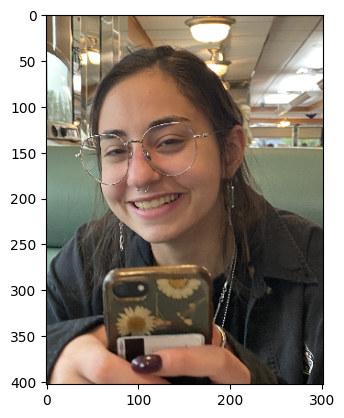

In [1]:
#Install Open CV and give tutorial on getting Jupyter notebook up and running.
# %pip install opencv-contrib-python
# %pip install matplotlib

#Import Libraries
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

#Saving the image in a variable
img = cv2.imread('proj1/img1.jpg')
img = cv2.resize(img, (0, 0), fx = 0.1, fy = 0.1)

#OpenCV by defualt uses BGR instead of RGB.  Old digital camera standard.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Use matplotlib while using a python notebook. Draw the image.
plt.imshow(img)



### The Step

To step through all the pixel values we need a control statement to tell the computer which values to iterate through.  

If the values are in a 2D array we would want the following statment:<p>

+ For each row in our grid.<br>
+ Visit each pixel in the row. <br>

A **For Loop** is the perfect programming tool to use for this statement.  A for loop requires three pieces of information: the data you want it to itereate through, the index to start at, and the index to end at.

In Python we write a for loop in the following manner:

for ***data*** in range(***starting index***, ***ending index***): 

Examining our statement we need to iterate through both the rows and individual pixels.  So we need two for loops to accomplish this statement.  This is called a **nested for loop**.

Sudo Code:<br>
For each row in our grid.<br>
Visit each pixel in the row. <br>

Python:<br>
for row in range(0, height):<br>
&nbsp;&nbsp;&nbsp;&nbsp;for pixel in range(0, width):<br>

Notice the spacing in the Python code.  A tab is used to indicate that one for loop is nested inside the other for loop.  

The row is the first dimension in our array and the pixel is the second dimension.  

image[row][pixel]

Let's use a nested for loop to step through all the pixels in our image.

In [2]:
#Stepping through the image.

#Save the height and width.
h = img.shape[0]
w = img.shape[1]
d = img.shape[2]

#A counting variable so we can keep track how many values we have.
count = 0

#Let's step through each pixel

#For each row in our grid. y = row
for y in range(0,h):
    #Search each pixel in the row. x = pixel
    for x in range(0,w):
       count+=1

#Print the total number of pixels. 200x200 = 40000
print(count)

#Reintialize the counting variable
count = 0

#Let's step through each RBG value.

#For each row in our grid. y = row
for y in range(0,h):
    #Search each pixel in the row. x = pixel
    for x in range(0,w):
        #Search each RGB value.
        for z in range(0,d):
             count+=1

#Print the total number of RGB values. 200x200x3 = 120000   
print(count)

121706
365118


Let's search for black and white pixels in our image. 

In [5]:
#Loop through the pixel array testing if the pixel is white.

#Save the height and width.
h = img.shape[0]
w = img.shape[1]

#Save the the RGB vales for white & black.
white = np.array([255,255,255])
black = np.array([0,0,0])

#A counting variable so we can keep track how many values we have.
count = 0

#For each row in our grid. y = row
for y in range(0,h):
    #Search each pixel in the row. x = pixel
    for x in range(0,w):
        #If the RGB values equal white.
        if np.array_equal(img[y,x],white):
            #Print the 2D array location.  
            print("Pixel [",y,"]","[",x,"]", "is the color white.")
            #Increase the counting variable
            count+=1

#Print the total number of white pixels. 
print("There are",count,"white pixels.")

Pixel [ 12 ] [ 167 ] is the color white.
Pixel [ 12 ] [ 170 ] is the color white.
Pixel [ 12 ] [ 173 ] is the color white.
Pixel [ 12 ] [ 174 ] is the color white.
Pixel [ 12 ] [ 175 ] is the color white.
Pixel [ 12 ] [ 176 ] is the color white.
Pixel [ 12 ] [ 177 ] is the color white.
Pixel [ 12 ] [ 179 ] is the color white.
Pixel [ 12 ] [ 180 ] is the color white.
Pixel [ 12 ] [ 191 ] is the color white.
Pixel [ 12 ] [ 192 ] is the color white.
Pixel [ 12 ] [ 193 ] is the color white.
Pixel [ 13 ] [ 165 ] is the color white.
Pixel [ 13 ] [ 171 ] is the color white.
Pixel [ 13 ] [ 172 ] is the color white.
Pixel [ 13 ] [ 173 ] is the color white.
Pixel [ 13 ] [ 174 ] is the color white.
Pixel [ 13 ] [ 175 ] is the color white.
Pixel [ 13 ] [ 176 ] is the color white.
Pixel [ 13 ] [ 177 ] is the color white.
Pixel [ 13 ] [ 178 ] is the color white.
Pixel [ 13 ] [ 179 ] is the color white.
Pixel [ 13 ] [ 180 ] is the color white.
Pixel [ 13 ] [ 181 ] is the color white.
Pixel [ 13 ] [ 1

In [6]:
#Now let's test for black pixels.

#Set our count variable to zero.
count = 0

#For each row in our grid.
for y in range(0,h):
    #Search each pixel in the row.
    for x in range(0,w):
        #If the RGB values equal white.
        if np.array_equal(img[y,x],black):
            #Print the 2D array location.
            print("Pixel [",y,"]","[",x,"]", "is the color black.")
            #Increase the counting variable.
            count+=1

#Print the total number of black pixels.
print("There are",count,"black pixels.")

There are 0 black pixels.


### Results

There are 5 white pixels and 401 black pixels.  Visually this makes sense, the large dark areas in her hair must be where most of the black values exist.  Her eyes may look like they are filled with white but our data is telling us different.  Her eyes would contain more than 5 white pixels.  It's good to remember that our monitors can not produce a 100% accurate reproduction of our image data and every human's eyes will interpret color differently.  

Let's turn 401 black pixels to red (255,0,0) so we can view where they are in the image and see if at least one of our assumptions is right. 

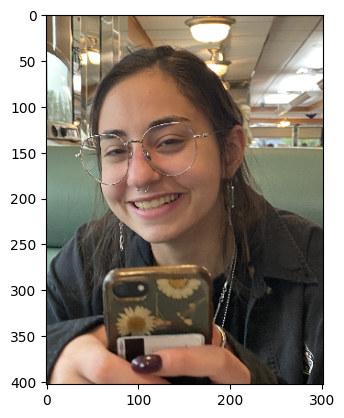

In [7]:
#Let's turn the black pixels red to show there location.

#Let's save a copy of the image.
imgRed = copy.deepcopy(img)

#Save the RGB value for red.
red = np.array([255,0,0])

#For each row in our grid.
for y in range(0,h):
    #Search each pixel in the row.
    for x in range(0,w):
        #If the RGB values equal black.
        if np.array_equal(imgRed[y,x],black):
            #Turn the black pixel red.
            imgRed[y,x] = red

#Draw the image.  Use matplotlib while using a python notebook. 
plt.imshow(imgRed)

### Our First Image Filter

So far we have searched the pixel array for values that exactly match black or white.  What if you wanted to select all pixels above a certain brightness value?  This seems like a useful tool if you wanted to select those light values in her eyes and face that are not quite 100% white or the dark areas that make up her hair.  The segmenting of an image by it's brightness is called **Thresholding**.  

To perform the Threshold filter on our image we set a fixed value as your dividing point between selected pixels and deselected pixels.  If your pixel value(s) are above the brightness threshold they are set to white and if they are below they are set to black.  A Threshold filter returns a binary image.

 Let's first convert our RGB image to greyscale so the brightness is saved in the pixel value.  The following code will take you through the process. 

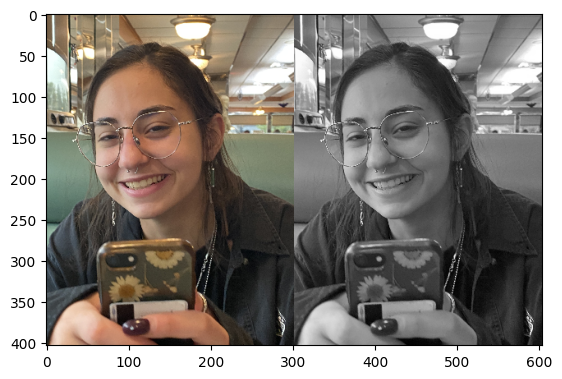

In [15]:
#Let's turn our image grayscale.

#Let's copy our image 
imgGrey = copy.deepcopy(img)

#For each row in our grid.
for y in range(0,h):
    #Search each pixel in the row
    for x in range(0,w):

        #Converting the color image to greyscale.  Average method.  Divide R,G,B values by 3 and sum them. 
        imgGrey[y,x,0] = img[y,x,0]/3 + img[y,x,1]/3 + img[y,x,2]/3
        imgGrey[y,x,1] = img[y,x,0]/3 + img[y,x,1]/3 + img[y,x,2]/3
        imgGrey[y,x,2] = img[y,x,0]/3 + img[y,x,1]/3 + img[y,x,2]/3
    
    
#Combine the greyscale and the original image so they can be displayed at the same time.  axis=0 for vertical axis=1 for horizontal alignment.
imgTwo = np.concatenate((img, imgGrey), axis=1)

#Draw the image.  Use matplotlib while using a python notebook. 
plt.imshow(imgTwo)

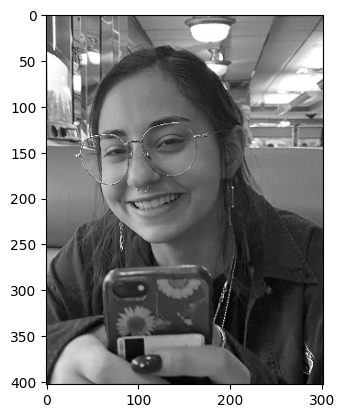

In [16]:
#Now the OpenCv way to covert to grayscale.

#Convert all the pixels to greyscale values
imgOcvGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Convert back to RGB to display with plt
# REPLACED WITH MY OWN BGR TO RGB
imgOcvGrey = cv2.cvtColor(imgOcvGrey, cv2.COLOR_BGR2RGB)

plt.imshow(imgOcvGrey)

In [17]:
# RGB to HSV function 
import cv2
import numpy as np
from numpy import interp

def rgb_to_hsv(rgb):
    # rgb is an 1-D array [r,g,b] with values in range [0,255]. 
    # r = rgb[0], b = rgb[1], g = rgb[2]
    # hsv is an 1-D array [h,s,v] with values in range h = [0,360], s = [0,1], v = [0,1].

    # normalize color values and convert to floating point values between 0 - 1
    rgb = rgb/255

    # initialize HSV
    h = 0.0
    s = 0.0
    v = 0.0
    #hsv = np.zeros((1,1,255), dtype=np.uint8)
    # find max and min values 
    v = np.max(rgb)
    vMin = np.min(rgb)

    # set saturation value
    if(v>0.0):
        s = (v - vMin)/v
    else:
        s = 0.0

    diff = (v - vMin)

    # compute the hue by the relative sizes of the RGB components
    # r=g=b, color is gray
    # 
    if(rgb[0][0][0] == rgb[0][0][1] and rgb[0][0][1] == rgb[0][0][2]):
        h = 0
    # is the point within +/- 60 degrees of the red axis
    elif(rgb[0][0][0] == v):
        h = 60 * (rgb[0][0][1] - rgb[0][0][2]) / diff
    # is the point within +/- 60 degrees of the green axis
    elif(rgb[0][0][1] == v):
        h = 120 + 60 * (rgb[0][0][2] - rgb[0][0][0]) / diff
    # is the point within +/- 60 degrees of the blue axis
    elif(rgb[0][0][2] == v):
        h = 240 + 60 * (rgb[0][0][0] - rgb[0][0][1]) / diff

    #make sure it returns ints and not floats and in the right range???
    s = np.interp(rgb[0,0,1],[0,1],[0,255])
    v = np.interp(rgb[0,0,2],[0,1],[0,255])
    # s = np.interp(s,[0,1],[0,255])
    # v = np.interp(v,[0,1],[0,255])
    
    return np.array([[[int(h),int(s),int(v)]]])


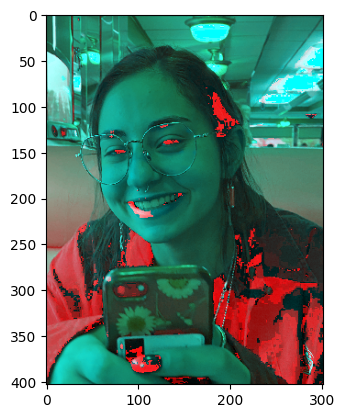

In [18]:
#Threshold filter on our image. 
#Let's copy our image and create a blank image array to store our threshold.

def img_to_rgb(img):
    h = img.shape[0]
    w = img.shape[1]
    # Destination image, make sure it's the same size
    des = np.zeros((img.shape[0],img.shape[1],img.shape[2]), dtype=np.uint8)

    #For each row in our grid.
    for y in range(0,h):
        #Search each pixel in the row
        for x in range(0,w):
            des[y][x] = rgb_to_hsv(np.array([[img[y,x]]]))
            
    return des  

#turn img into hsv array        
imghsv = img_to_rgb(img)

#Use matplotlib while using a python notebook. Draw the image.
plt.imshow(imghsv)

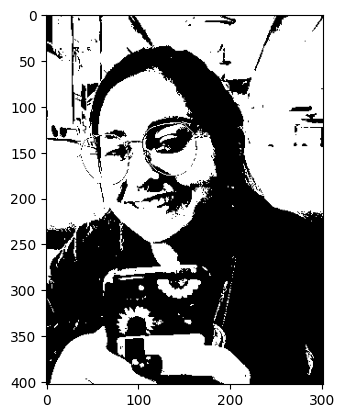

In [19]:
# OpenCv Threshold filter
# anything above 100 is white ,anything below is
th, imgOcvThres = cv2.threshold(imgGrey, 100, 255, cv2.THRESH_BINARY);
plt.imshow(imgOcvThres)

### Exercises

**(1)** Search for all the white pixels in the provided image.  Save there locations in a 2-D Array.<br><br> 
**(2)** Convert the provided image to greyscale.  Count how many pixels are above the brightness threshold of 100.  Then change the threshold to 150 and count how many pixels are below.  Print both counts. <br>  (*hint* - you can resuse the provided code)<br><br> 


Module 2 in class project
1.) Convert from RGB to HSV using our own funciton and not OpenCv's, inside the nested pixel loop
2.) Apply that to the image pipeline
3.) Extra credit - Create BGR to RGB function within ght nested pixel loop